# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Traffic Data.csv')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [6]:
df.drop(columns=['weather_description'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   traffic_volume  19980 non-null  float64       
 1   temp            20000 non-null  float64       
 2   rain_1h         20000 non-null  float64       
 3   snow_1h         20000 non-null  float64       
 4   clouds_all      20000 non-null  int64         
 5   weather_main    20000 non-null  object        
 6   date_time       20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
df['weather_main'].unique()

array(['Mist', 'Clear', 'Clouds', 'Rain', 'Thunderstorm', 'Fog',
       'Drizzle', 'Snow', 'Haze', 'Smoke'], dtype=object)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

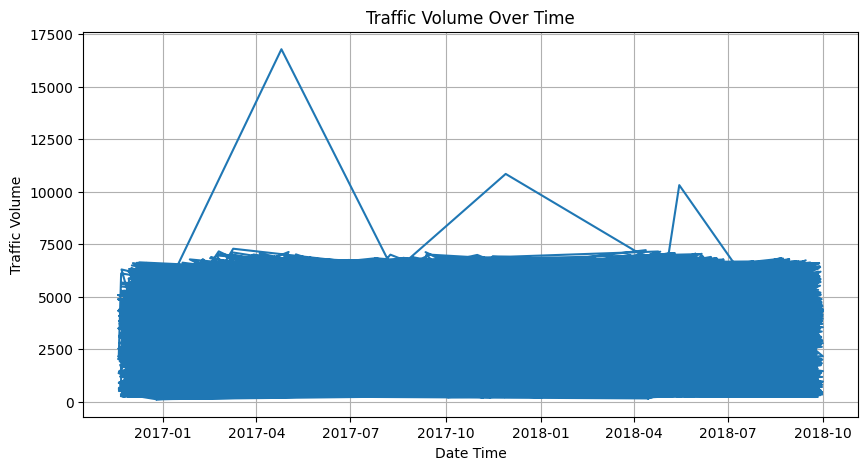

In [9]:
import matplotlib.pyplot as plt
# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(df['date_time'], df['traffic_volume'])
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.grid(True)
plt.show()

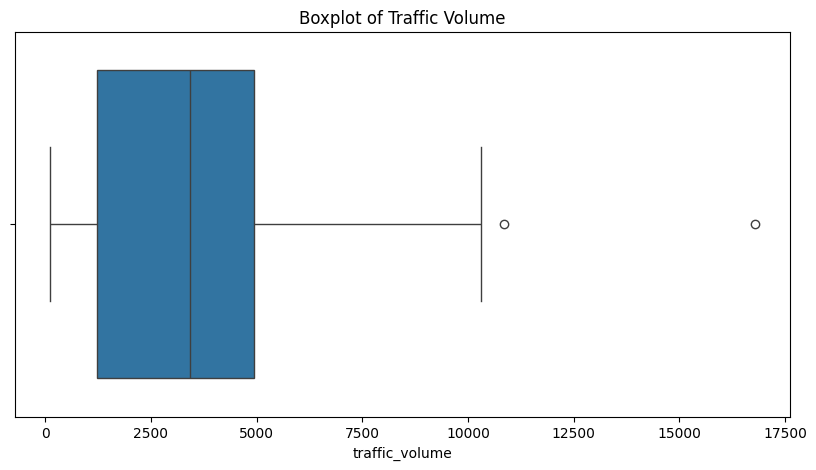

In [10]:
import seaborn as sns
# Boxplots for outlier detection
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

In [11]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
date_time,0


In [12]:
df.dropna(inplace=True)

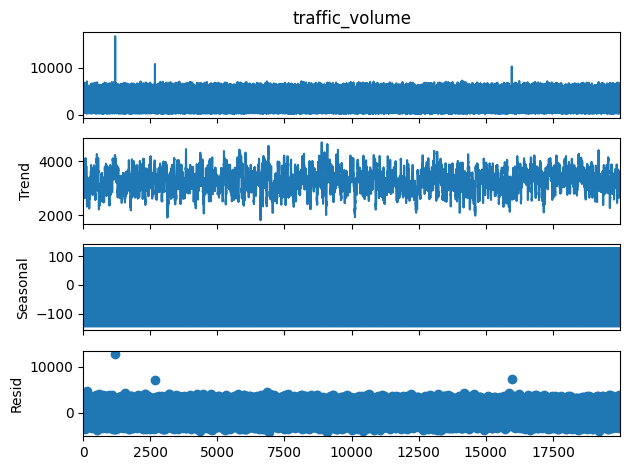

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [14]:
df.duplicated().sum()

12

In [15]:
# create lags
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)

In [16]:
# create movine average
df['traffic_volume_ma7'] = df['traffic_volume'].rolling(window=7).mean()

In [17]:
df.sort_values('date_time', inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [18]:
df.set_index('date_time', inplace=True)

In [19]:
df['Day_of_the_week']= df.index.day_of_week
df['Month'] = df.index.month
df['Day of the year'] = df.index.day_of_year
df['Week']= df['Day_of_the_week'] >= 5


df['Difference_between_depth_to_groundwater_p24']= df['Day_of_the_week'].diff()

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.dropna(inplace=True)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19973 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   traffic_volume                               19973 non-null  float64
 1   temp                                         19973 non-null  float64
 2   rain_1h                                      19973 non-null  float64
 3   snow_1h                                      19973 non-null  float64
 4   clouds_all                                   19973 non-null  int64  
 5   weather_main                                 19973 non-null  int64  
 6   traffic_volume_lag1                          19973 non-null  float64
 7   traffic_volume_lag2                          19973 non-null  float64
 8   traffic_volume_ma7                           19973 non-null  float64
 9   Day_of_the_week                      

In [35]:
X_train_num = X_train.drop('weather_main', axis=1)
X_test_num = X_train.drop('weather_main', axis=1)


In [36]:
df.dropna(inplace=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [38]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_ma7,Day_of_the_week,Month,Day of the year,Week,Difference_between_depth_to_groundwater_p24
date_time,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,6038.0,316.0,3777.142857,4,11,323,False,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,3253.0,2716.0,2609.428571,4,11,323,False,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,8,775.0,2915.0,3308.000000,4,11,323,False,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,3071.0,353.0,2645.142857,4,11,323,False,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,2453.0,6234.0,3209.000000,4,11,323,False,0.0


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [40]:
history= model_lstm.fit(X_train_lstm , y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 7637335.0000
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 3929520.2500
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3894929.5000
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3863520.2500
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3851507.7500
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3864641.2500
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3886675.5000
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3847763.2500
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3853754.5000
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3867059.7500
Epoch 11/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3838002.2500
Epoch 12/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3833418.2500
Epoch 13/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3935424.5000
Epoch 14/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

<Axes: >

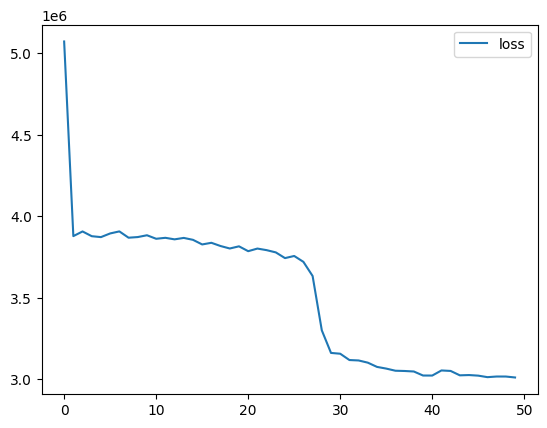

In [41]:
pd.DataFrame(history.history).plot()

In [46]:
y_pred = model_lstm.predict(X_test_lstm)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: xlabel='date_time'>

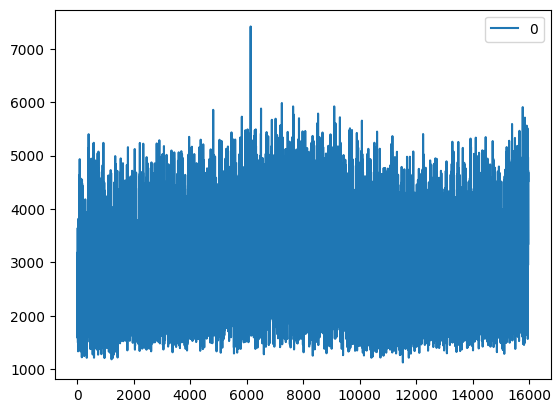

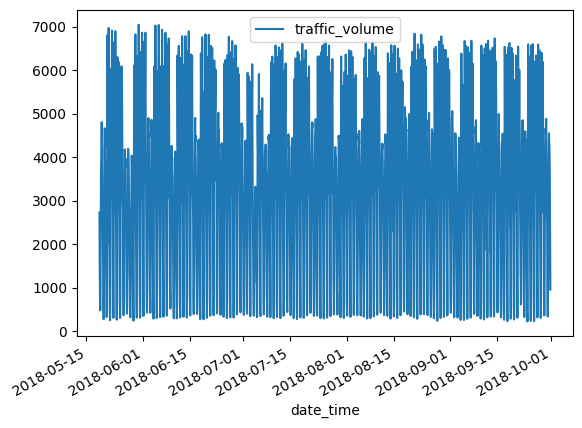

In [49]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [56]:
# rehape y_pred to match the t y_test
y_pred = y_pred.reshape(-1)[:len(y_test)]

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1846.291268901801
MSE: 4681969.224201969
RMSE: 2163.7858545156378


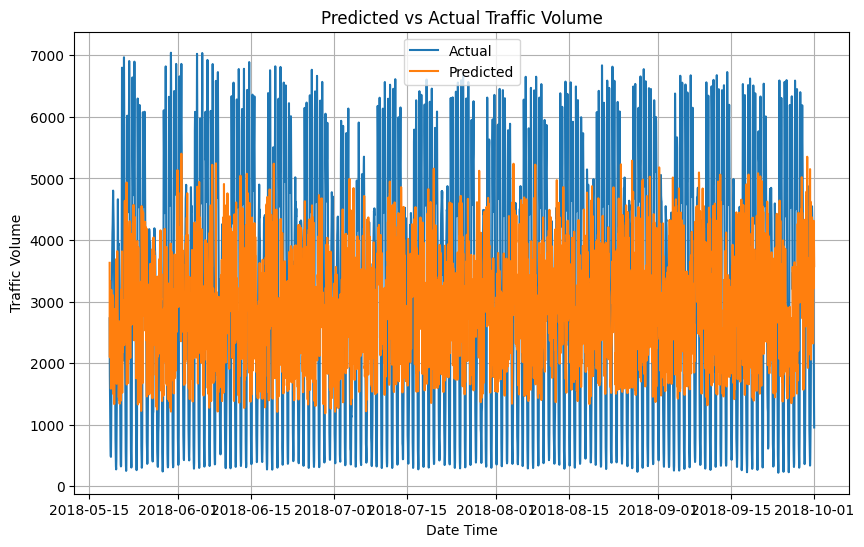

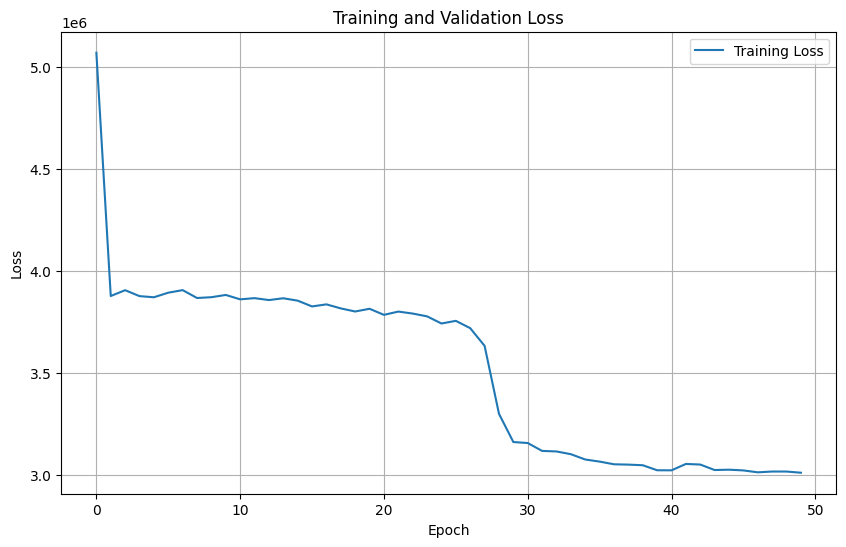

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.title('Predicted vs Actual Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

if 'loss' in history.history:
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [58]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input
from keras.callbacks import EarlyStopping

model_rnn = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(units=25, return_sequences=True),
    Dropout(0.25),

    SimpleRNN(units=25),
    Dropout(0.25),


    # SimpleRNN(units=50, return_sequences=True)
    # Dropout(0.25)

    Dense(units=1)
])

model_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 13, 25)              │             675 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,976 (7.72 KB)

 Trainable params: 1,976 (7.72 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [61]:
Early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

model_rnn.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=Early_stopping)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 8051712.0000 - mean_squared_error: 8051712.0000 - val_loss: 8073931.0000 - val_mean_squared_error: 8073931.0000
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 7836035.0000 - mean_squared_error: 7836035.0000 - val_loss: 8034042.5000 - val_mean_squared_error: 8034042.5000
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 8033978.5000 - mean_squared_error: 8033978.5000 - val_loss: 7994657.0000 - val_mean_squared_error: 7994657.0000
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7911409.0000 - mean_squared_error: 7911409.0000 - val_loss: 7955305.0000 - val_mean_squared_error: 7955305.0000
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7916436.5000 - mean_squared_error: 7916436.5000 - val_loss: 7916219.0000 - val_mean_squared_error: 7916219.0000
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 7836351.0000 - mean_squared_error: 7836351.0000 - val_loss: 7877209.0000 - v

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [62]:
y_pred = model_rnn.predict(X_test_scaled)

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='date_time'>

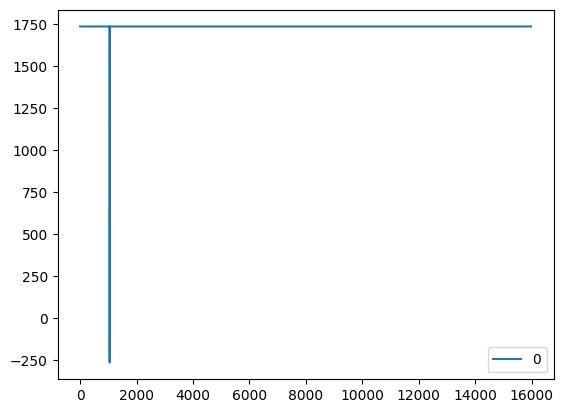

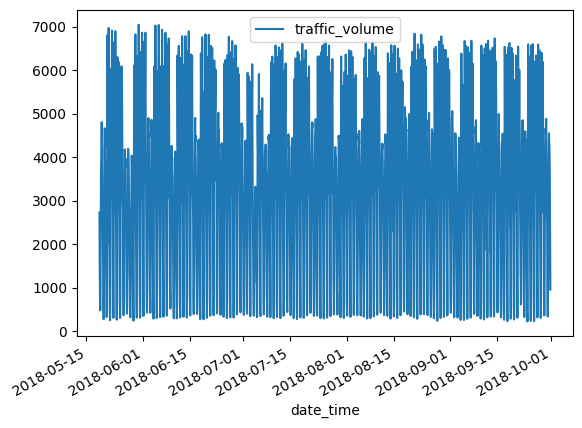

In [63]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1. Data preprocessing:

Normalization: Ensured all features were on the same scale for better LSTM performance.

Handling Missing Values: Cleaned the data to prevent errors during training.
2. Feature Engineering:

Time Features: Added month/day to help the model recognize patterns.

Moving Averages: Smoothed out data to highlight trends.

3. Model Architecture:
LSTM: Chosen for its ability to remember sequences in time series data.

Activation Functions: Used ReLU and tanh for efficient learning.

4. Training Process:

Batch Size & Epochs: Balanced for speed and effectiveness.

Optimizer: Adam was selected for its reliability.

5. Loss Function and Metrics:

MSE: Chosen to measure prediction accuracy.

Metrics: Used MAE and RMSE to evaluate performance.

6. Model Tuning:

Hyperparameter Tuning: Adjusted settings for better
performance.

Regularization: Used dropout to prevent overfitting.

7. Overfitting/Underfitting:

Overfitting: Monitored and controlled with dropout and early
stopping.

Underfitting: Adjusted model complexity as needed.

8. Future Improvements:

Explore Other Models: Consider GRU or traditional methods.

Enhance Features: Add more data sources.

Refine Tuning: Further optimize hyperparameters.
